# Lab 6.04 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

C:\Users\32468\AppData\Local\Temp\ipykernel_13400\1793403083.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  

1. Make the following plot  

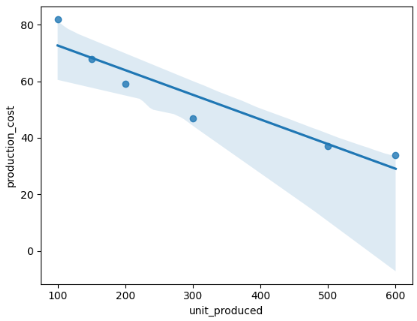

2. Based on this plot  
    1. Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
    2. Can you decide whether the relationship between number of units produced and production costis weak / strong.  
    3. Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
3. What is the production cost for the 400th unit?  
4. How much loss will the company incur if not a single unit is produced?  
5. How much does it cost in total to produce 1000 units  


Some answers:

- 3. the 400th unit costs 46.5051  
- 4. loss when no unit produced 81.392  
- 5. total cost for 1000 units 37739.8969

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

,unit_produced,production_cost
0,100,82
1,150,68
2,200,59
3,300,47
4,500,37
5,600,34


<Axes: xlabel='unit_produced', ylabel='production_cost'>

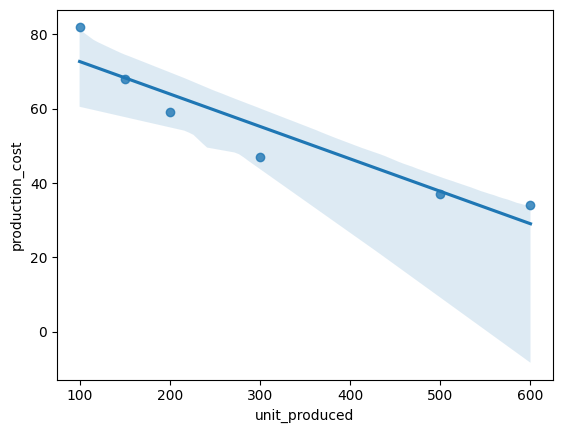

In [7]:
# following plot

sns.regplot(data = df, x = 'unit_produced', y = 'production_cost')

In [8]:
# vraag 2

# .1 negatief <- rechte is dalend
# .2 het is een sterk verband -> punten sluiten mooi aan bij de rechte
# .3 interval is [-1,-0.5]

cor = np.corrcoef(df.unit_produced, df.production_cost)[0][1]
print(f'R = {cor:.4f}')

R = -0.9395


In [11]:
# vraag 3
x = df.unit_produced
y = df.production_cost
a,b = np.polyfit(x,y,1)
print(f'Regression line ^y = {a} * x + {b}')
print(f'Regression line voor 400 = {a * 400 +b}')

Regression line ^y = -0.08721649484536075 * x + 81.39175257731956
Regression line voor 400 = 46.50515463917527


In [12]:
# vraag 4

print(f'Regression line: ^y = {a * 0 + b}')

Regression line: ^y = 81.39175257731956


In [14]:
# vraag 5
#iets langere versie

totaal = 0
for i in range(1,1001):
  totaal += a * i + b
print(totaal)

37739.89690721651


In [17]:
# vraag 5
#iets kortere versie

sum([a * i + b for i in range(1,1001)])

37739.89690721651